In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Date Exploration

In [3]:
df = pd.read_csv('music_dataset_mod.csv')
print(df.head(1))

        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766             99.06184   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                     17.62863   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   

   Ambient Sound Influence  Instrumental Overlaps    Genre  
0                96.439665              53.771763  Country  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [125]:
df_music_realistic  = df.copy()
df_music_realistic 

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [6]:
df_music_realistic ['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

In [129]:
missing_values = df_music_realistic.isnull().sum()
print(missing_values)

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64


In [8]:
# Number of rows in the DataFrame
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")


Number of rows: 1000


In [9]:
df_cleaned = df_music_realistic.dropna(subset=['Genre'])
df_cleaned.shape[0]

890

number of unigue value is 5
Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64


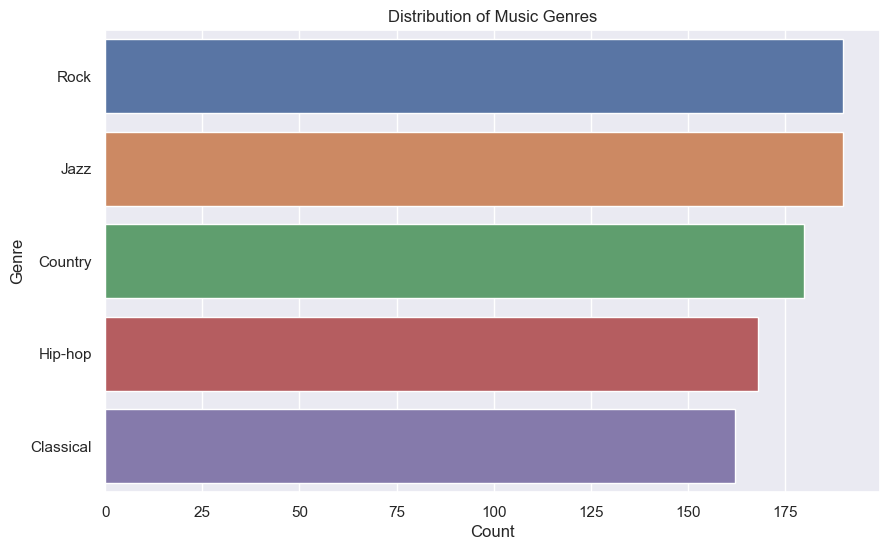

In [134]:
# Number of unique genres
unique_genre = df_cleaned['Genre'].nunique()
print(f'number of unigue value is {unique_genre}')

# Distribution of genres
genre_distrubution = df_cleaned['Genre'].value_counts()
print(genre_distrubution)

# Visualize the distribution

plt.figure(figsize=(10, 6)) 
sns.countplot(y='Genre', data=df_cleaned, order=df_cleaned['Genre'].value_counts().index)
plt.title('Distribution of Music Genres') 
plt.xlabel('Count') 
plt.ylabel('Genre') 
plt.show()

## Correlation Analysis

In [136]:
#Split the Data into Training and Test Sets

x = df_cleaned.drop('Genre', axis= 1)
y = df_cleaned['Genre']


In [138]:
#Transform Categorical Variables into Numerical Ones

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Verify the transformation 
print(df_cleaned.head(1))

        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766             99.06184   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                     17.62863   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   

   Ambient Sound Influence  Instrumental Overlaps    Genre  
0                96.439665              53.771763  Country  


In [140]:
encoded_genre_data = df_cleaned.copy()
encoded_genre_data.drop(columns=['Genre'], inplace=True)
encoded_genre_data['Genre_encoded'] = y_encoded
encoded_genre_data.head(1)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.06184,14.686768,17.62863,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1


In [142]:
encoded_genre_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre_encoded                890 non-null    int32  
dtypes: float64(12), int32(1)


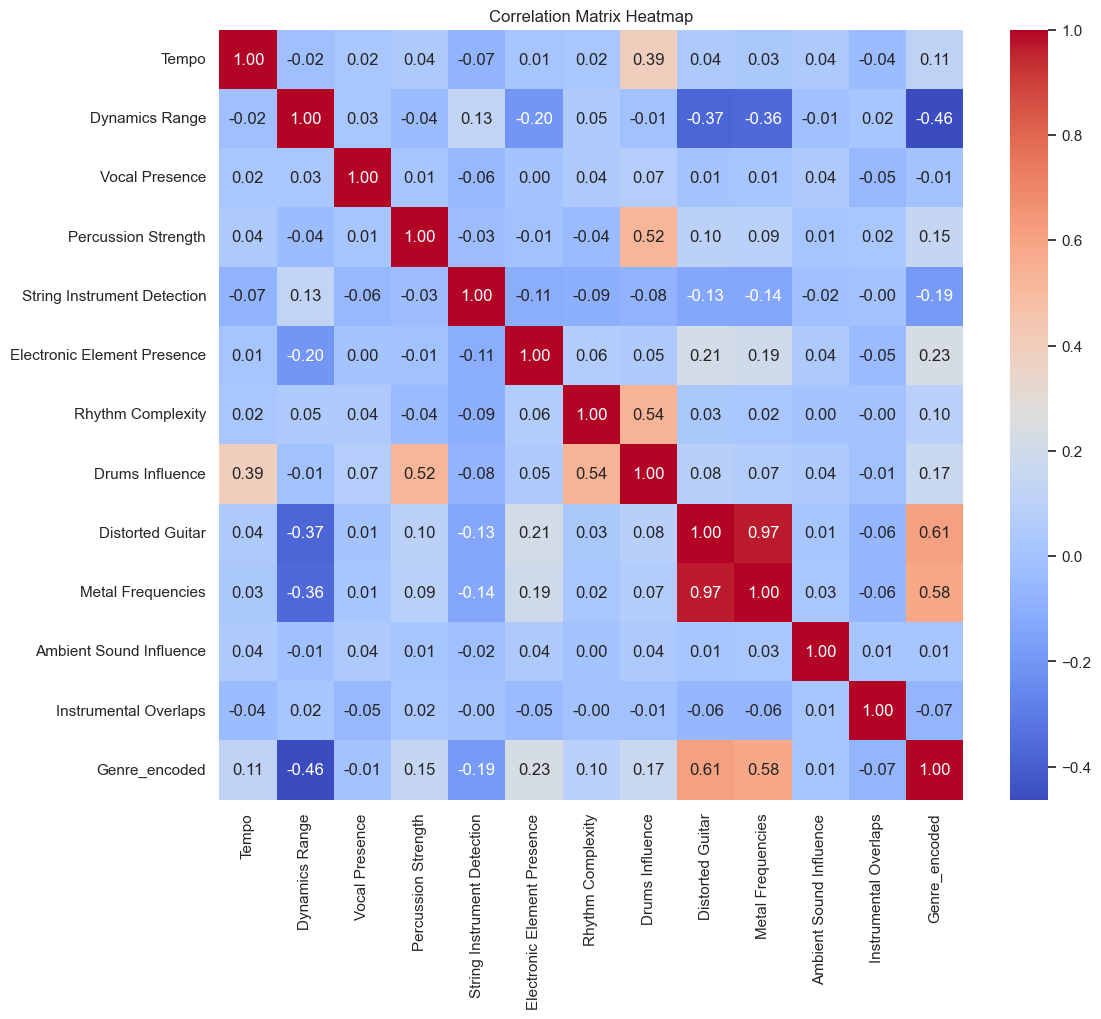

In [144]:
#Create a Correlation Matrix

correlation_matrix = encoded_genre_data.corr()

# Plot the heatmap 
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') 
plt.title('Correlation Matrix Heatmap') 
plt.show()


## PCA for Dimensionality Reduction

In [146]:
# Standardize the data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [149]:
# Apply PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_scaled)

In [151]:
# # Calculate explained variance
explaned_variance = pca.explained_variance_ratio_
cumulative_variance = explaned_variance.cumsum()

print(explaned_variance)
print(f'cumulative varience= {cumulative_variance}')

[0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474 0.07000221 0.05996203 0.01267309 0.00279105]
cumulative varience= [0.20063071 0.35125878 0.44495077 0.53191983 0.61728037 0.69895416
 0.77843687 0.85457161 0.92457383 0.98453586 0.99720895 1.        ]


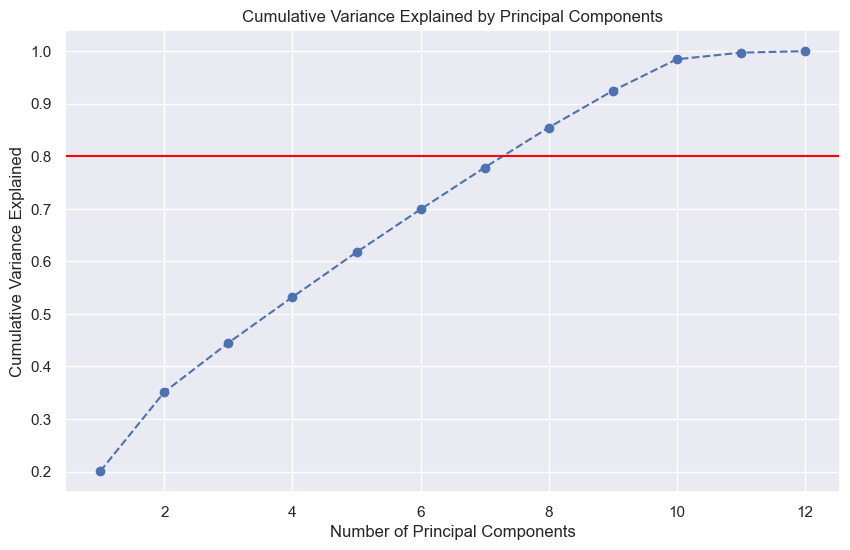

In [153]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance) + 1), explaned_variance.cumsum(), marker='o', linestyle='--')
plt.axhline(y=0.8, color='red', linestyle='-')
plt.title('Cumulative Variance Explained by Principal Components') 
plt.xlabel('Number of Principal Components') 
plt.ylabel('Cumulative Variance Explained') 
plt.grid(True) 
plt.show()

## Evaluating Classification Efficacy
### PCA-Transformed vs. Original Data

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x_train_pca, y_encoded, test_size=0.3, random_state=42)

In [158]:
log_reg_pca = LogisticRegression(max_iter=10000)
log_reg_pca.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [160]:
y_pred_pca = log_reg_pca.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy on PCA-transformed data:{accuracy}")
print("Classification Report on PCA-transformed data:\n", classification_report(y_test, y_pred_pca,target_names=label_encoder.classes_))

Accuracy on PCA-transformed data:0.5280898876404494
Classification Report on PCA-transformed data:
               precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.33      0.25      0.28        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



#### original data

In [163]:
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(x_scaled,
                                                                        y_encoded, test_size=0.3,
                                                                        random_state=42)
log_reg_orig = LogisticRegression(max_iter=10000)
log_reg_orig.fit(x_train_orig, y_train_orig)


LogisticRegression(max_iter=10000)

In [166]:
y_pred_orig = log_reg_orig.predict(x_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print(f"Accuracy on PCA-transformed data: {accuracy_orig}")
print("Classification Report on PCA-transformed data:\n", classification_report(y_test_orig, y_pred_orig, target_names=label_encoder.classes_))

Accuracy on PCA-transformed data: 0.5280898876404494
Classification Report on PCA-transformed data:
               precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.33      0.25      0.28        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



## Genre Prediction and Integration

In [170]:
df_unknown_genre = df_copy[df_copy["Genre"].isnull()]
df_unknown_genre.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN


In [172]:
X_unknown_NOGenre = df_unknown_genre.drop(columns=['Genre'])
X_unknown_NOGenre.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399


In [174]:
X_unknown_NOGenre.shape[0]

110

In [176]:
x_unk_scaled = scaler.transform(X_unknown_NOGenre)
x_unk_pca = pca.transform(x_unk_scaled)

In [180]:
y_unk_pred = log_reg_pca.predict(x_unk_pca)

In [188]:
df_unknown_genre.loc[:, 'Predicted_Genre'] = label_encoder.inverse_transform(y_unk_pred)

In [190]:
print(df_unknown_genre[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31          Hip-hop
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]
